In [49]:
## Install required bs
'''
pip install numpy scipy matplotlib librosa
'''

'\npip install numpy scipy matplotlib librosa\n'

## Plot Time Domain Features

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

FRAME_SIZE = 1024
HOP_LENGTH = 512

# Load audio
audio_file = "debussy.wav"  # Replace with your file
y, sr = librosa.load(audio_file)

In [51]:
## General info
ipd.Audio(audio_file)

In [52]:
## Number of samples
print("Number of samples: ", len(y))
## Sampling rate
print("Sampling Rate: ", sr)
## Duration of 1 sample
print("Duration of 1 sample in seconds: ", 1/sr)
## Duration of entire audio
print("Duration of audio: ", (1/sr)*len(y))

Number of samples:  661500
Sampling Rate:  22050
Duration of 1 sample in seconds:  4.5351473922902495e-05
Duration of audio:  30.0


Text(0.5, 1.0, 'Debusy')

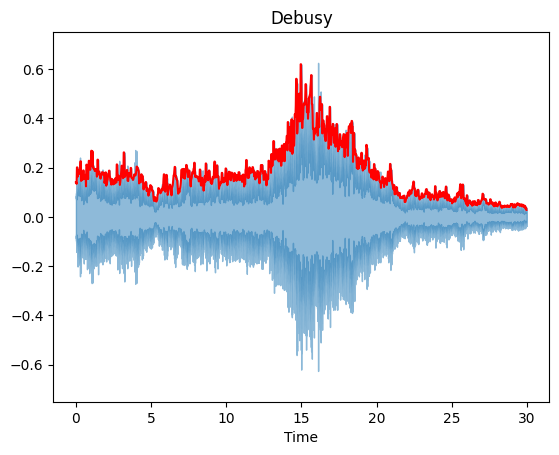

In [11]:
# Amplitude Envelope
def amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

ae_debussy = amplitude_envelope(y, FRAME_SIZE, HOP_LENGTH)

frames = range(len(ae_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.ylim((-0.75, 0.75))
plt.title("Debusy")

Text(0.5, 1.0, 'Debusy')

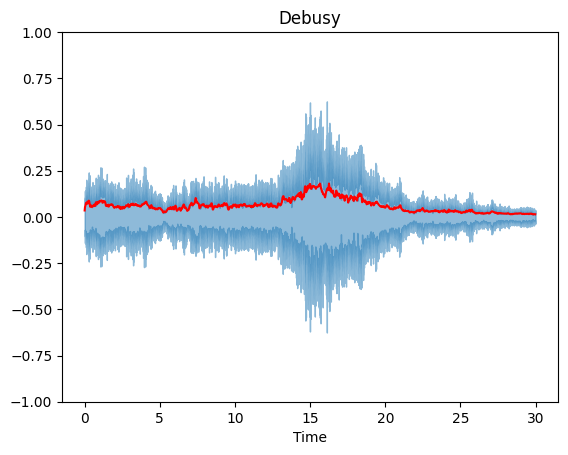

In [44]:
# RMS Energy
rms_debussy = librosa.feature.rms(y=y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

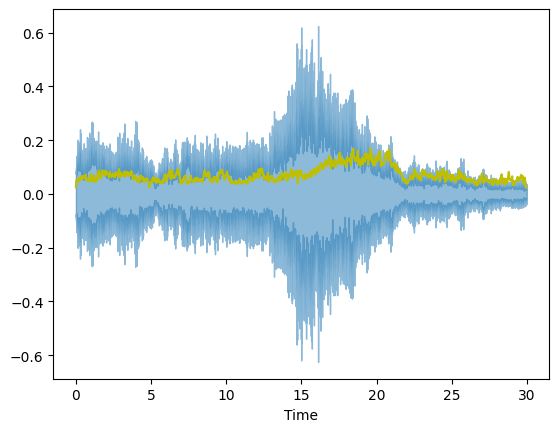

In [13]:
## Zero Crossing Rate
zcr_debussy = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
frames = range(len(zcr_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, zcr_debussy, color="y")

## Performing STFT and plotting frequency 

In [31]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    plt.show()

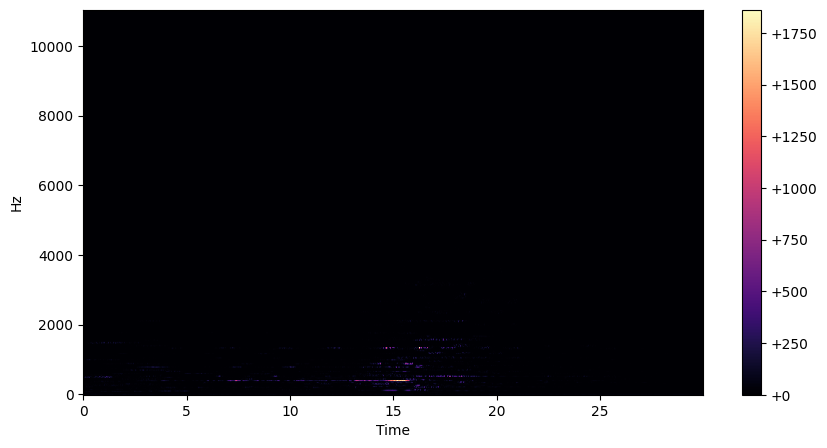

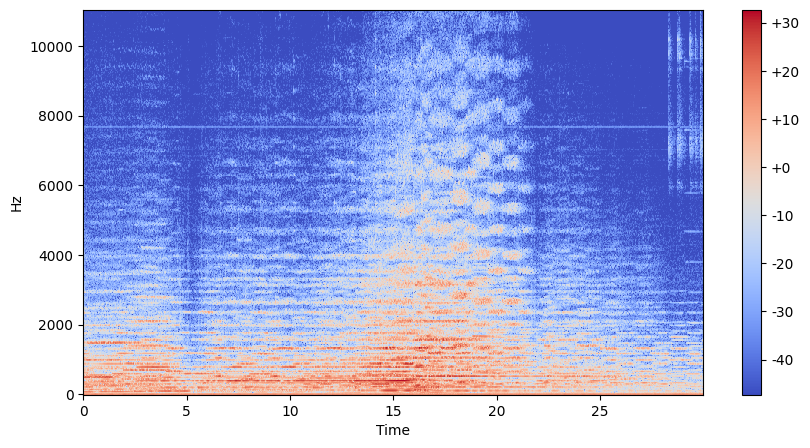

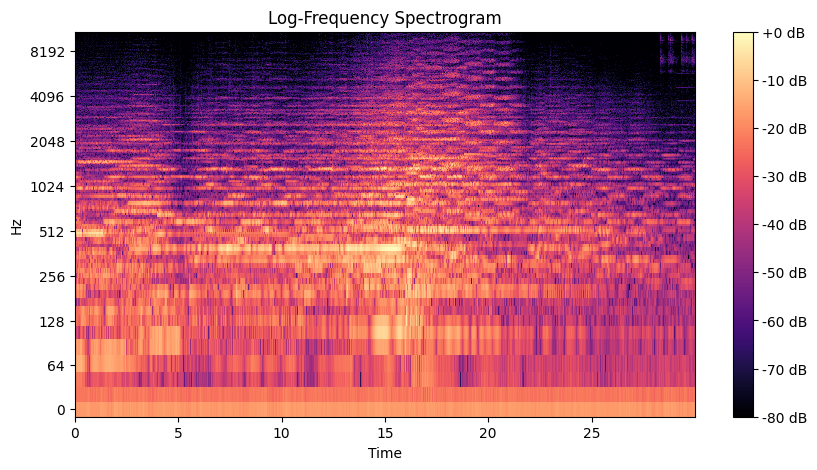

In [33]:
# Short-Time Fourier Transform (STFT)
D = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
y_amp = np.abs(D) ** 2

## Plotting Spectrogram
plot_spectrogram(y_amp, sr, HOP_LENGTH)

## PLotting Log-Amplitude Spectrogram
y_log = librosa.power_to_db(y_amp)
plot_spectrogram(y_log, sr, HOP_LENGTH)

## Plotting Log Frequency Spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot Frequency Spectrum
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Frequency Spectrogram')
plt.show()

## Plot Spectrogram

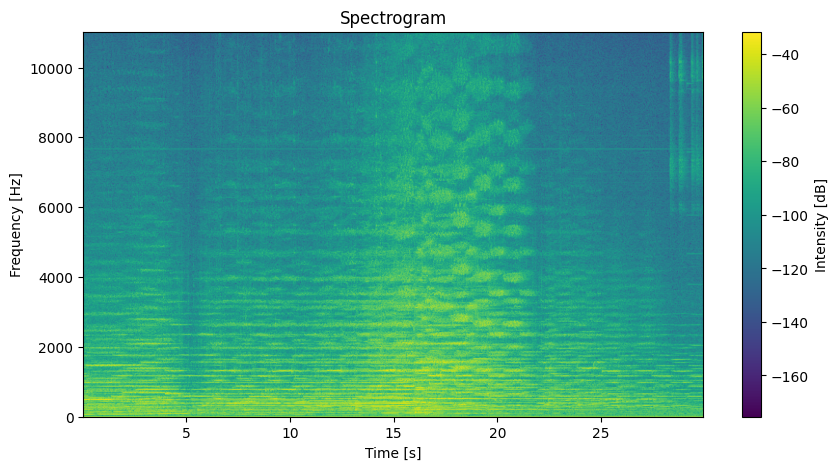

In [38]:
# Spectrogram
plt.figure(figsize=(10, 5))
plt.specgram(y, Fs=sr, NFFT=2048, noverlap=1024, cmap='viridis')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.title('Spectrogram')
plt.show()

## Plot mel spectrogram and mel filter banks

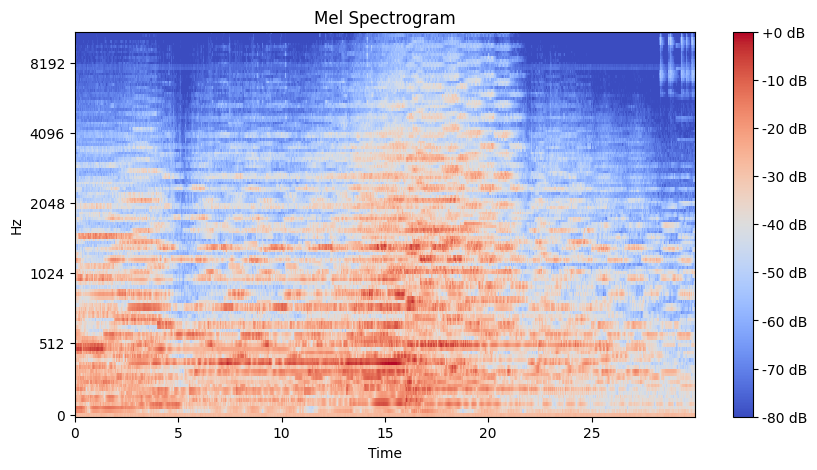

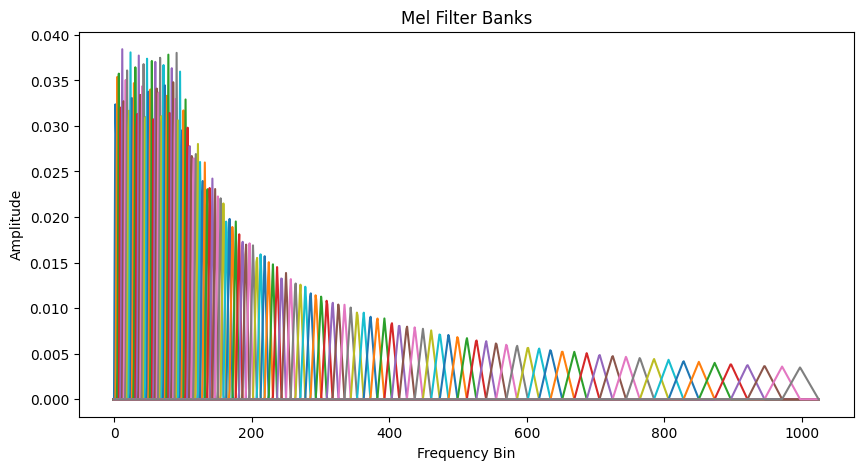

In [42]:
# Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr/2)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

# Mel Filter Banks
mel_filters = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=128)
plt.figure(figsize=(10, 5))
for i in range(mel_filters.shape[0]):
    plt.plot(mel_filters[i])
plt.title("Mel Filter Banks")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.show()

## Extract MFCCs

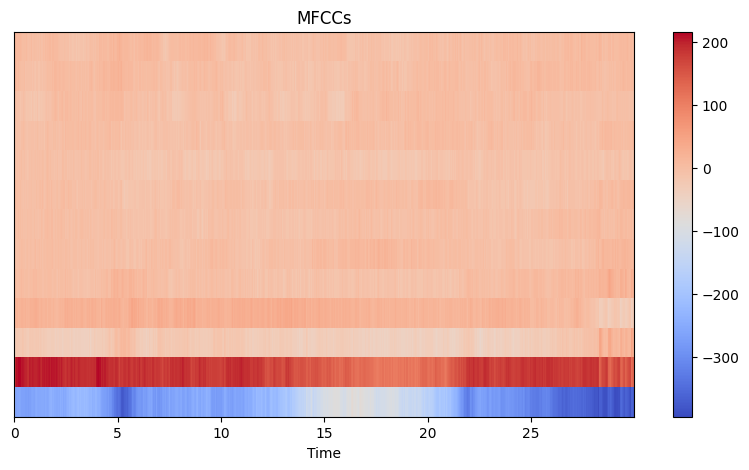

In [23]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

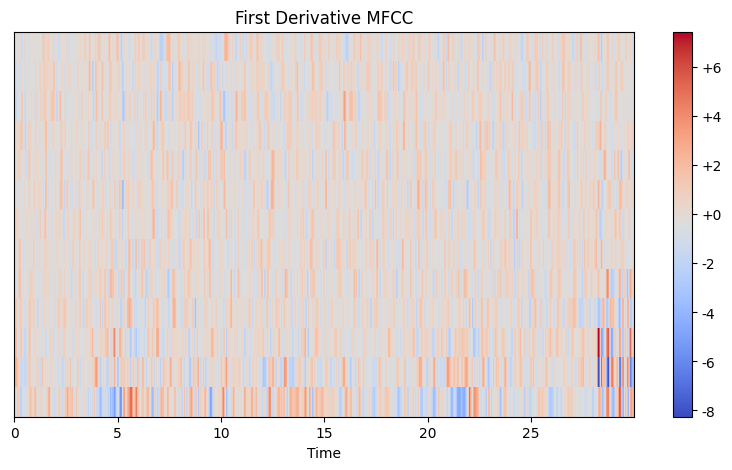

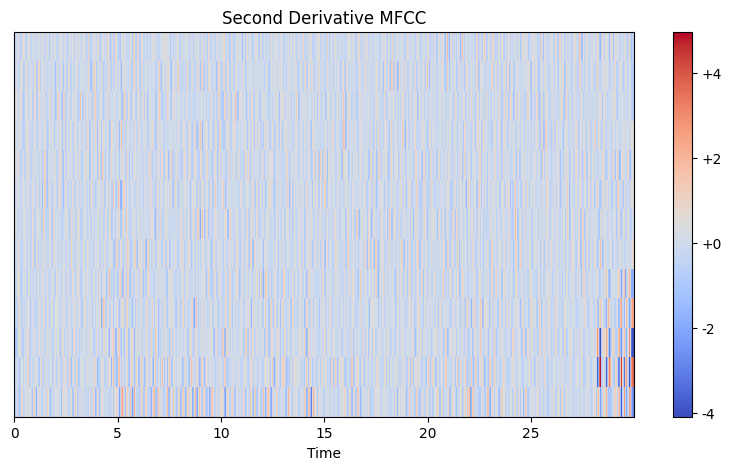

In [26]:
## First and Second MFCC Derivatives
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

plt.figure(figsize=(10, 5))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("First Derivative MFCC")
plt.show()

plt.figure(figsize=(10, 5))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("Second Derivative MFCC")
plt.show()

## Visualize Spectral Bandwidth, Spectral Centroid, and Band Energy Ratio

Text(0.5, 1.0, 'Spectral Features')

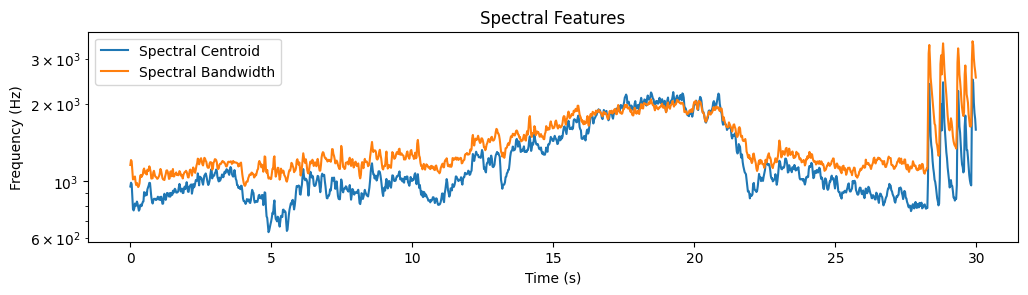

In [48]:
# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Plot Features
plt.figure(figsize=(12, 6))
times = librosa.times_like(spectral_centroid)

plt.subplot(2, 1, 1)
plt.semilogy(times, spectral_centroid[0], label='Spectral Centroid')
plt.semilogy(times, spectral_bandwidth[0], label='Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.title('Spectral Features')

## Power Spectrum

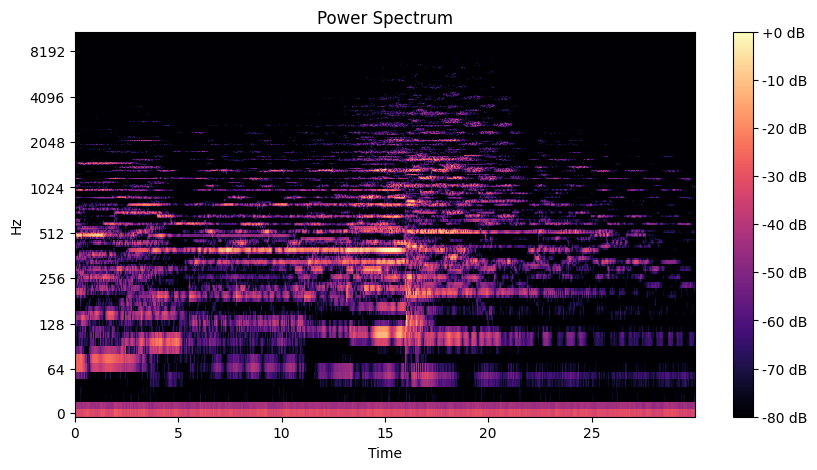

In [21]:
# Compute the Short-Time Fourier Transform (STFT) for the power spectrum
S = np.abs(librosa.stft(y))**2  # Power spectrum
ps = librosa.amplitude_to_db(S, ref=np.max)

# Time axis for plotting
frames = range(len(centroid[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting
plt.figure(figsize=(10, 5))

# 1. Power Spectrum
librosa.display.specshow(ps, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrum')
plt.show()